In [1]:
#Initialisation Cell
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

# Logistic Regression

Firstly, I will covert the .arff files to .csv files since they are easier to work with. Thus the following code 

In [2]:
# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

Now then, we begin with the algorithm,

Training Data : 
              precision    recall  f1-score   support

          -1       0.92      0.91      0.91      1460
           1       0.93      0.93      0.93      1857

   micro avg       0.92      0.92      0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

Confusion Matrix : 
[[1327  133]
 [ 122 1735]]
Note : The diagonal from left to right indicates correct predictions,whereas the diagonal from right to left indicates incorrect predictions.


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


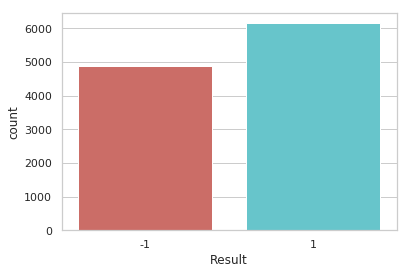

In [3]:
#Training Dataset
data_train = pd.read_csv('Training Dataset.csv', header = 0)
data_train = data_train.dropna()

#x_train = data_train.iloc[:, :-1]
#y_train = data_train.iloc[:, -1]
print('Training Data : ')
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('Result', axis = 1), 
           data_train['Result'], test_size=0.30, 
            random_state=101)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

print(classification_report(y_test, predictions))
print('Confusion Matrix : ')
cm = confusion_matrix(y_test, predictions)
print(cm)

print('Note : The diagonal from left to right indicates correct predictions,' 
       + 'whereas the diagonal from right to left indicates incorrect predictions.')

sns.countplot(x = 'Result', data=data_train, palette='hls')
plt.show()
#data.head()


-  Here y is the actual data which we are going to predict, everything else is going to be the features(x)
- Set the text size to 30 percent and you don’t actually have to set your random state but this is put so if you want your result to match mines exactly.
- We used **train_test_split** from the **cross_validation** module to split our data. 70%of the data will be training data and %30 will be testing data from the training dataset.

We got 92% accuracy which is not bad at all.

Testing Data : 
              precision    recall  f1-score   support

          -1       0.94      0.96      0.95       418
           1       0.95      0.92      0.93       319

   micro avg       0.94      0.94      0.94       737
   macro avg       0.94      0.94      0.94       737
weighted avg       0.94      0.94      0.94       737

Confusion Matrix : 
[[403  15]
 [ 27 292]]
Note : The diagonal from left to right indicates correct predictions,whereas the diagonal from right to left indicates incorrect predictions.


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


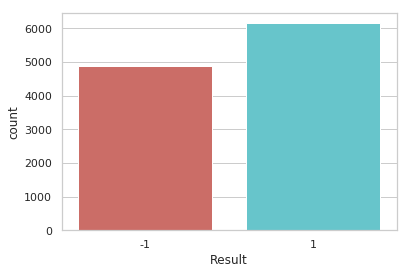

In [4]:
data_test = pd.read_csv('old.csv', header = 0)
data_test = data_test.dropna()

#print(data_test['Result'].value_counts())

#x_train = data_train.iloc[:, :-1]
#y_train = data_train.iloc[:, -1]
print('Testing Data : ')
x_train, x_test, y_train, y_test = train_test_split(data_test.drop('Result', axis = 1), 
           data_test['Result'], test_size=0.30, 
            random_state=101)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

print(classification_report(y_test, predictions))
print('Confusion Matrix : ')
cm = confusion_matrix(y_test, predictions)
print(cm)
print('Note : The diagonal from left to right indicates correct predictions,' 
       + 'whereas the diagonal from right to left indicates incorrect predictions.')

sns.countplot(x = 'Result', data=data_train, palette='hls')
plt.show()


With the testing data we find that our accuracy is 94% from following the same procedure as the training data. Thus there for the model is good, very good.